In [20]:
import pandas as pd

In [21]:
df1=pd.read_csv(r'C:\DB\data\data_1.csv',header=None)
df2=pd.read_csv(r'C:\DB\data\data_2.csv',header=None)
df3=pd.read_csv(r'C:\DB\data\data_3.csv',header=None)
df4=pd.read_csv(r'C:\DB\data\data_4.csv',header=None)
df5=pd.read_csv(r'C:\DB\data\data_5.csv',header=None)
df6=pd.read_csv(r'C:\DB\data\data_6.csv',header=None)
frames = [df1, df2, df3 ,df4, df5, df6]
df= pd.concat(frames)


In [24]:
import pyspark

spDF = sqlContext.createDataFrame(df)
rdd1 = spDF.rdd

In [25]:
from pyspark.ml.linalg import DenseVector

data=rdd1.map(lambda line:(line[0],DenseVector(line[1:])))



In [26]:
data = spark.createDataFrame(data, ["label", "features"])
train,test=data.randomSplit([.8,.2],seed=123)
train.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
| 75.4|[19.0,0.0,0.0,7.0...|
|76.71|[19.0,0.0,0.0,7.0...|
|76.71|[19.0,0.0,0.0,7.0...|
|76.71|[19.0,0.0,0.0,7.0...|
|76.71|[19.0,0.0,1.0,7.0...|
|76.71|[19.0,1.0,0.0,7.0...|
|76.71|[19.0,1.0,0.0,7.0...|
|78.03|[19.0,0.0,0.0,7.0...|
|78.03|[19.0,0.0,0.0,7.0...|
|78.03|[19.0,1.0,0.0,7.0...|
|79.38|[19.0,0.0,0.0,7.0...|
|79.38|[19.0,1.0,0.0,7.0...|
| 86.6|[19.0,0.0,0.0,7.0...|
| 86.6|[19.0,0.0,0.0,7.0...|
| 86.6|[19.0,1.0,0.0,7.0...|
| 86.6|[19.0,1.0,0.0,7.0...|
| 86.6|[19.0,1.0,1.0,7.0...|
| 88.1|[19.0,1.0,0.0,7.0...|
| 88.1|[19.0,1.0,1.0,7.0...|
|89.62|[19.0,1.0,0.0,7.0...|
+-----+--------------------+
only showing top 20 rows



In [27]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
lrModel = lr.fit(train)

In [28]:
predicted = lrModel.transform(test)
predicted.show()


+-----+--------------------+------------------+
|label|            features|        prediction|
+-----+--------------------+------------------+
| 75.4|[19.0,0.0,1.0,7.0...|137.22187652558483|
| 75.4|[19.0,1.0,0.0,7.0...| 143.6447958916741|
| 75.4|[19.0,1.0,1.0,7.0...|155.18580778347064|
|76.71|[19.0,1.0,0.0,7.0...|155.10289109723908|
|76.71|[19.0,1.0,0.0,7.0...|155.13077404437013|
|79.38|[19.0,0.0,1.0,7.0...|137.22187652558483|
| 88.1|[19.0,1.0,0.0,7.0...|155.27018878002528|
|89.62|[19.0,1.0,0.0,7.0...| 143.6447958916741|
|89.62|[19.0,1.0,1.0,7.0...|155.18580778347064|
| 90.8|[19.0,0.0,0.0,7.0...|137.13895983935322|
|91.17|[19.0,1.0,0.0,7.0...| 143.6447958916741|
|92.37|[19.0,1.0,0.0,7.0...|155.24230583289426|
|93.96|[19.0,1.0,0.0,7.0...| 155.2144228857632|
|95.59|[19.0,1.0,0.0,7.0...|155.27018878002528|
|95.93|[19.0,1.0,0.0,7.0...| 155.2144228857632|
|96.15|[19.0,0.0,0.0,7.0...| 93.46038104060177|
|96.15|[19.0,0.0,1.0,7.0...| 91.12830750973141|
|96.15|[19.0,1.0,0.0,7.0...|100.66329077

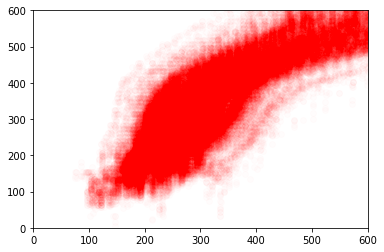

In [33]:
p=predicted.toPandas() 
import matplotlib.pyplot as plt
plt.plot(p.label, p.prediction, 'ro',alpha=0.01)
plt.axis([0,600,0,600])
plt.show()

In [30]:
from sklearn.metrics import r2_score

r2_score(p.label, p.prediction)

0.70922129610846996

In [31]:
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [10.6725547199,6.50583605232,0.0829166862316,-6.59162707264,-1.01045615778,32.1280284123,-71.4041973621,30.8497853765,0.0027882947131,-38.1936506852]
Intercept: 15.3702035183415
